# Melbourne Housing Project

## 1. Examine and explore data

### 1.1 Data pre-processing

In [1]:
# Import the necessary library for this report
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # MATLAB-like data visualization 
import seaborn as sns # statiscal data visualization
import math # calculation tools

# Import model, method, metrics from sklearn module
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Load data from downloaded file stored in the same folder into DataFrame
df = pd.read_csv("Melbourne_housing_FULL.csv")
# Number of rows and columns of the data
print("The shape of the data is: ",df.shape)
# A glance at our dataset
df.head()

The shape of the data is:  (34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
# General information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

**The dataset contains the following features:**
> - **Suburb**: The area outside the center of a city
> - **Address**: Address of the house
> - **Rooms**: Number of rooms
> - **Type**: br -bedroom; h-house, cottage, villa, semi, terrace; u-unit, duplex; t-townhouse; dev site- development site; o res-other resiential
> - **Price**: Price in Australian dollars
> - **Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
> - **SellerG**: Real Estate Agent
> - **Date**: Date sold
> - **Distance**: Distance from CBD in km.
> - **Postcode**: Postcode of the region
> - **Bedroom2**: Scraped of Bedrooms
> - **Bathroom**: Number of bathrooms
> - **Car**: Number of carspots
> - **Landsize**: Land size in metres
> - **BuildingArea**: Building size in metres
> - **YearBuilt**: Year the house was built
> - **CouncilArea**: Governing council for the area
> - **Lattitude**: !!!!!!
> - **Longtitude**: !!!!!
> - **Regionname**: General region (West, North West, North, North East,..)
> - **Propertycount**: Number of properties that exist in the suburb
>
Totally, there are 43857 houses with 21 features

**Object Variables**

In [4]:
# Identiify object columns
obj_cats = df.select_dtypes(['object']).columns
# Convert objects to categorical variables
for colname in obj_cats:
    df[colname] = df[colname].astype('category')
# Convert "Date" datatype to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Descriptive statistic of categorical data
df.describe(include="category").T

,count,unique,top,freq
Suburb,34857,351,Reservoir,844
Address,34857,34009,5 Charles St,6
Type,34857,3,h,23980
Method,34857,9,S,19744
SellerG,34857,388,Jellis,3359
Date,34857,78,2017-10-28 00:00:00,1119
CouncilArea,34854,33,Boroondara City Council,3675
Regionname,34854,8,Southern Metropolitan,11836


**Numeric variables**

In [5]:
# Convert "Postcode" datatype to category
df['Postcode'] = df['Postcode'].astype('category')
# Add age variable
df['Age'] = 2017 - df['YearBuilt']
# Descriptive statistic of categorical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,26881.0,-3.781063e+01,0.090279,-38.19043,-37.86295,-37.8076,-3.775410e+01,-3.739020e+01


In [6]:
# We will clear features that we don't consider when analyze house prices
# such as Postcode,CouncilArea, Lattitude, Longtitude, SellerG, Address, Method, Date
redundant_features = ['Postcode', 'CouncilArea', 'Lattitude', 'Longtitude',
                     'SellerG', 'Address', 'Method', 'Date', 'YearBuilt']
for feature in redundant_features:
    df.drop(feature, axis=1, inplace=True)
df.head()

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Regionname,Propertycount,Age
0,Abbotsford,2,h,NaN,2.5,2.0,1.0,1.0,126.0,NaN,Northern Metropolitan,4019.0,NaN
1,Abbotsford,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,Northern Metropolitan,4019.0,NaN
2,Abbotsford,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,Northern Metropolitan,4019.0,117.0
3,Abbotsford,3,u,NaN,2.5,3.0,2.0,1.0,0.0,NaN,Northern Metropolitan,4019.0,NaN
4,Abbotsford,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,Northern Metropolitan,4019.0,117.0


**Duplicate variables**

In [7]:
# Examine Rooms and Bedrooms features
df['Rooms v Bedroom2'] = df['Rooms'] - df['Bedroom2']
df['Rooms v Bedroom2'].describe().T

count    26640.000000
mean         0.016254
std          0.317298
min        -27.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: Rooms v Bedroom2, dtype: float64

The differences between these variables are minimal so keeping both would only be duplicating information. Thus, the Bedroom2 feature will be removed from the data set altogether to allow for better analysis downstream.

In [8]:
# Drop 2 columns
df.drop(['Rooms v Bedroom2', 'Bedroom2'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)

**Missing data**

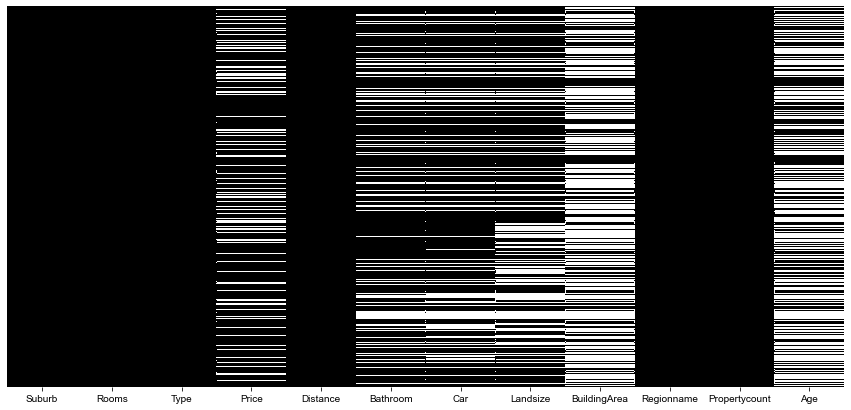

In [9]:
# Visualize missing values
fig, ax = plt.subplots(figsize = (15,7))
sns.set(font_scale=1.2)
# plot heatmap with cmap = "Greys_r"
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

In [10]:
# Counting the number of missing values on each col
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             6784
Distance             1
Bathroom          7310
Car               7811
Landsize         10849
BuildingArea     20114
Regionname           3
Propertycount        3
Age              18309
dtype: int64

In [11]:
# Percentage of missing values
df.isnull().sum()/len(df)*100

Suburb            0.000000
Rooms             0.000000
Type              0.000000
Price            20.054393
Distance          0.002956
Bathroom         21.609318
Car              23.090339
Landsize         32.071065
BuildingArea     59.459619
Regionname        0.008868
Propertycount     0.008868
Age              54.123803
dtype: float64

In [12]:
# Because price is important in this data and is required to be exact
# -> delete all NaN rows
df.dropna(subset=['Price'], inplace=True)

In [13]:
# Due to small amount of missing values about Regionname, Distance & Propertycount
# -> delete all NaN rows
df.dropna(subset=['Regionname', 'Propertycount', 'Distance'], inplace=True)

In [14]:
# We use mode value to replace NaN data in Bathroom, Car, Age
mode_feature = ['Bathroom', 'Car', 'Age']
for feature in mode_feature:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

In [15]:
# We also want to remove NaN data in Landsize, BuildingArea
df.dropna(subset=['Landsize', 'BuildingArea'], inplace=True)

**Outlier**<br>
Zero Landsize is still valid (indicative of 'zero-lot-line' homes).
However, zero building area will be removed because it's not possible for a home to hace a size of zero.

In [16]:
# We remove outliers in BuildingArea columns
df = df[df['BuildingArea'] != 0]

### 1.2 Correlation of Price with other features

Text(0.5, 1.0, 'Variable Correlation')

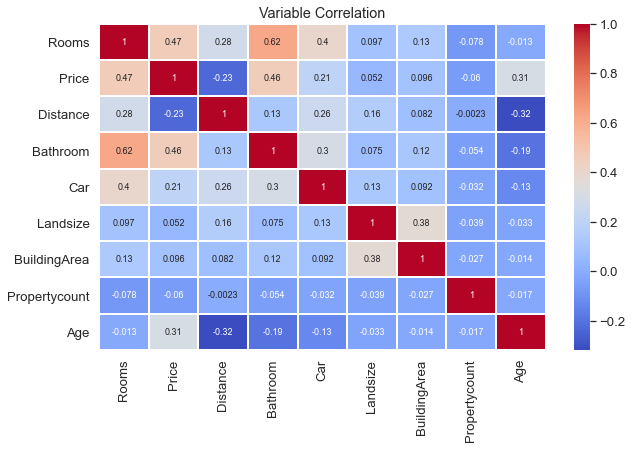

In [17]:
# Correlation diagram of all variables to each other
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap = 'coolwarm', linewidth = 1, annot = True, annot_kws
           = {"size": 9})
plt.title('Variable Correlation')

**No Correlation**
> - Landsize and Price
> - Propertycount and Price
> - Buildingarea and Price

**Weak Positive Correlation**
> - Age and Price
> - Car and Price

**Weak Negative Correlation**
> - Distance and Price

**Moderate Positive Correlation**
> - Rooms and Price
> - BathRooms and Price


**Visualize the relationship between numeric features and price**

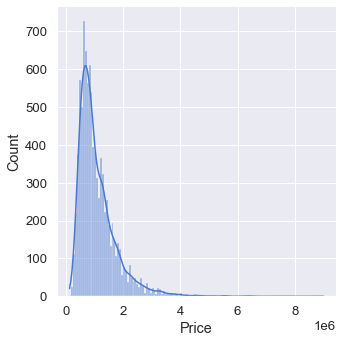

In [62]:
# Distribution of Price values
sns.set_palette("muted")
sns.displot(df['Price'], kde=True)
plt.show()

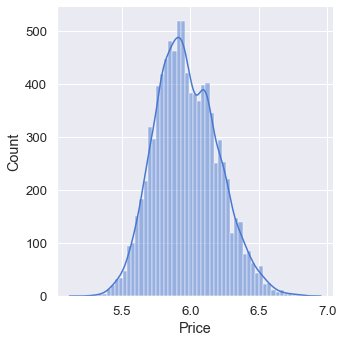

In [66]:
# Log transform the Price variable to approach a normal distribution
x = np.log10(df["Price"])
sns.set_palette("muted")
sns.displot(x, kde=True)
plt.show()

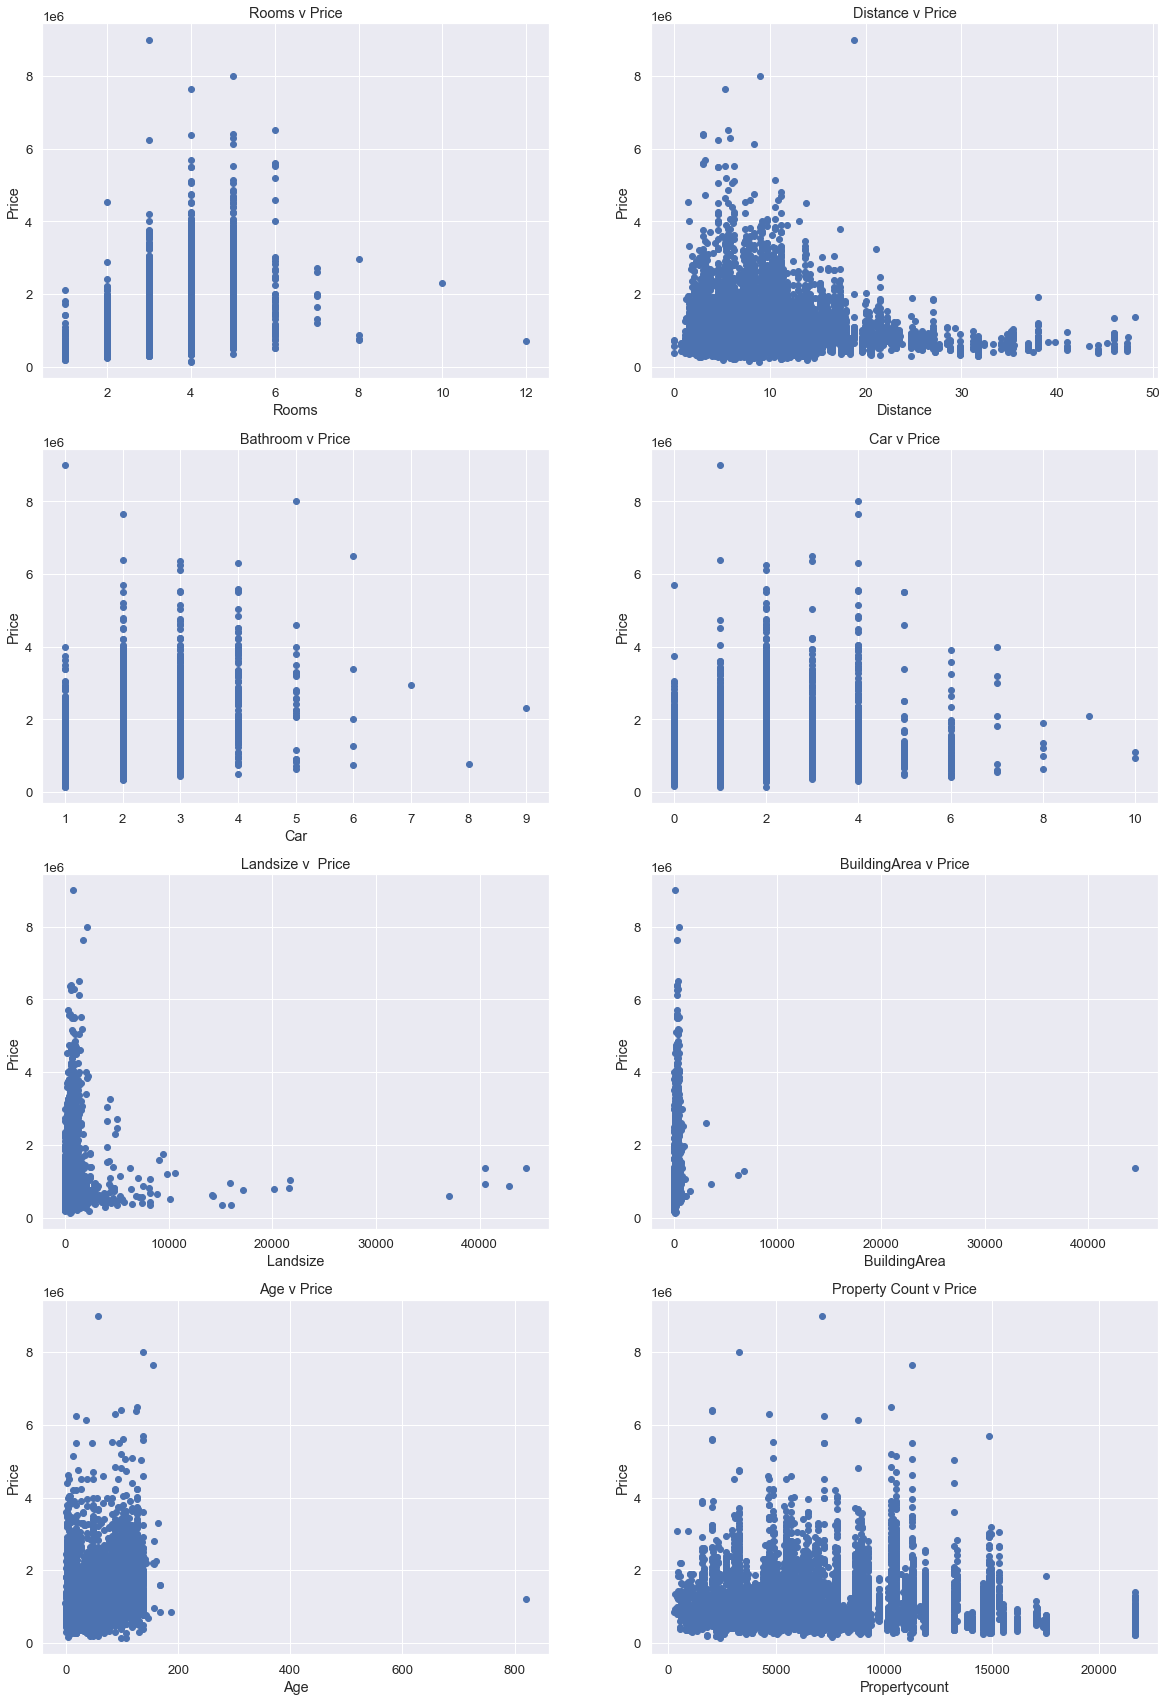

In [18]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = df, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = df, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = df, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = df, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('Price')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = df, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_title('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = df, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()

**Visualize the relationship between categorical features and price**

In [46]:
# Number of different suburbs
df['Suburb'].value_counts().count()

351

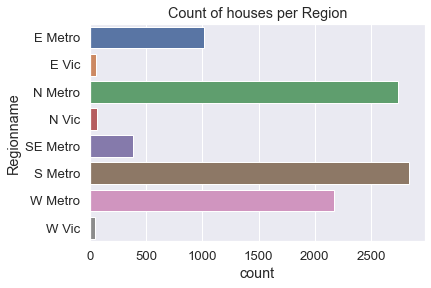

In [48]:
# Visualize number of houses in each region
title = 'Count of houses per Region'
sns.countplot(y = df['Regionname'])
plt.title(title)
plt.show()

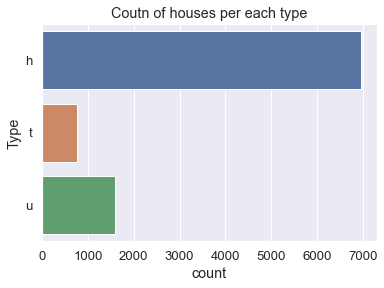

In [51]:
title = 'Coutn of houses per each type'
sns.countplot(y = df['Type'])
plt.title(title)
plt.show()

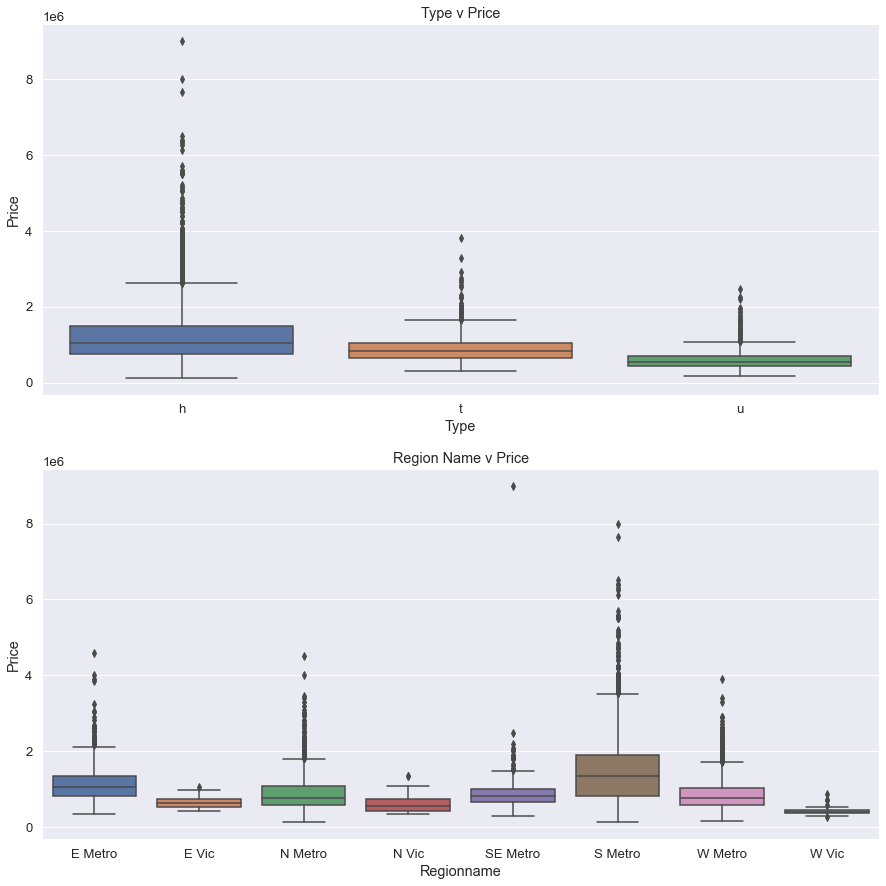

In [41]:
# Abbreviate Regionname categories
df['Regionname'] = df['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2, 1, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = df, x = 'Type', y = 'Price', ax = axes[0])
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Price')
axes[0].set_title('Type v Price')

# Plot [0,1]
sns.boxplot(data = df, x = 'Regionname', y = 'Price', ax = axes[1])
axes[1].set_xlabel('Regionname')
axes[1].set_ylabel('Price')
axes[1].set_title('Region Name v Price')

plt.show()

## 2.Model Prediction with Holdout and Cross Validation

### 2.1 Holdout

In [68]:
X, y = df, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Divide the data into 2 train set and test set
# Initializatione
LR = LinearRegression()
LR.fit(X_train, y_train) # train model
y_pred = LR.predict(X_test) # y_predicted
plt.scatter(y_test,y_pred) # plot to compare y_predicted and y_test
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=3)
plt.xlabel('y_Predicted') # assign label for x axis
plt.ylabel('y_Test') # assign label for y axis
plt.title('Linear Regression with Holdout') # assign title for diagram
plt.show()

NameError: name 'target' is not defined

### 2.2 Cross validation